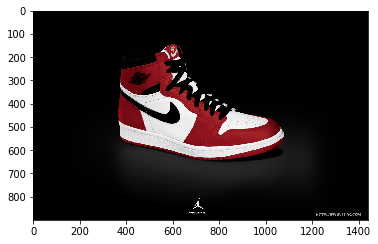

In [112]:
import copy
import numpy as np
from PIL import Image  
from PIL import ImageEnhance
from PIL import ImageFilter
from PIL import ImageOps

from matplotlib import pyplot as plt
import time

class PILimageAugmentor:
    def __init__(self, cfg, **kwargs):
        self.cfg = cfg


    def aug_image(self, image, **kwargs):
        image = image.rotate(30)
        
        enh = ImageEnhance.Color(image)
        image = enh.enhance(1.5)
        enh = ImageEnhance.Contrast(image)
        image = enh.enhance(1.5)
        enh = ImageEnhance.Brightness(image)
        image = enh.enhance(1.5)
        enh = ImageEnhance.Sharpness(image)
        image = enh.enhance(1.5)
        
#         # ImageFilter
        image = image.filter(ImageFilter.BLUR)
        image = image.filter(ImageFilter.BoxBlur(3))
        image = image.filter(ImageFilter.GaussianBlur(radius=2))
        image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
        image = image.filter(ImageFilter.MedianFilter(size=3))
        image = image.filter(ImageFilter.MinFilter(size=3))
        image = image.filter(ImageFilter.MaxFilter(size=3))
        image = image.filter(ImageFilter.ModeFilter(size=3))
        
#         # Only bug fixes have been added since the Pillow fork.
#         # New in version 1.1.3.
        image = ImageOps.autocontrast(image, cutoff=1, ignore=None)
        image = ImageOps.crop(image, border=10)
        image = ImageOps.equalize(image, mask=None)
        image = ImageOps.expand(image, border=10, fill=10)
        image = ImageOps.fit(image, size=(224,224), method=0, bleed=0.0, centering=(0.5, 0.5))
        image = ImageOps.flip(image)
        image = ImageOps.grayscale(image)
        image = ImageOps.invert(image)
        image = ImageOps.mirror(image)
        image = ImageOps.posterize(image, bits=4)
        image = ImageOps.solarize(image, threshold=128)
        
        
        
        
        
        return image
    
pilimageAugmentor = PILimageAugmentor(None)
org_image = Image.open("../data/01.jpg")
plt.imshow(org_image)

image augmentation is done!


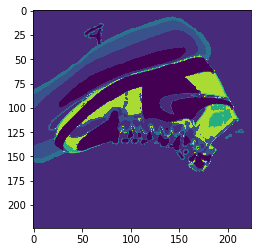

In [114]:
aug_img = pilimageAugmentor.aug_image(org_image)
plt.imshow(aug_img)
print("image augmentation is done!")